## Tarea 2

### Cargar los datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
datos = pd.read_csv("../actividad/dynamic_pricing.csv")

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [6]:
datos.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


#### Mostrar distribuciones de cada variable mediante histogramas

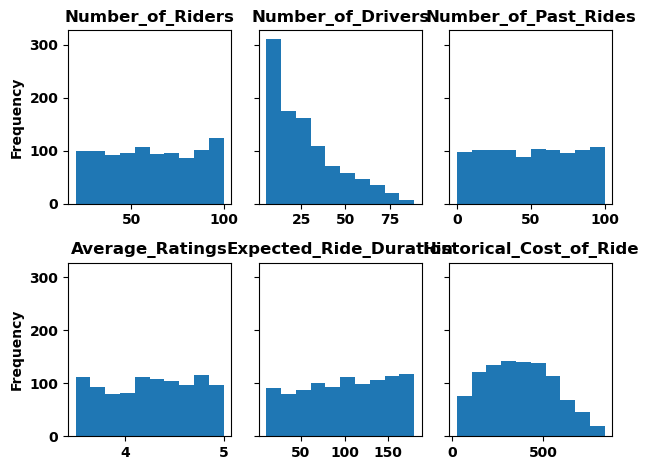

In [8]:
figure, axis = plt.subplots(2, 3, sharex = False, sharey = True) # Crear una figura para guardar los subplots
datos['Number_of_Riders'].plot(kind='hist', ax = axis[0,0], title='Number_of_Riders')
datos['Number_of_Drivers'].plot(kind='hist', ax = axis[0,1], title='Number_of_Drivers')
datos['Number_of_Past_Rides'].plot(kind='hist', ax = axis[0,2], title='Number_of_Past_Rides')
datos['Average_Ratings'].plot(kind='hist', ax = axis[1,0], title='Average_Ratings')
datos['Expected_Ride_Duration'].plot(kind='hist', ax = axis[1,1], title='Expected_Ride_Duration')
datos['Historical_Cost_of_Ride'].plot(kind='hist', ax = axis[1,2], title='Historical_Cost_of_Ride')
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

### Regresión Lineal Simple

Implementar dos modelos de regresión simple teniendo como variable de respuesta el costo histórico del viaje y como variable independiente el número de viajes pasados y el otro modelo tomar como variable de respuesta el costo histórico del viaje y como variable independiente la duración del viaje siga las siguientes actividades

* #### Calcular la ecuación de regresión, interpretar los parámetros (intercepto y coeficiente de regresión) e indicar si son significativos de acuerdo con el t-statistic.

In [11]:
# Se utiliza la librería statsmodel.formula.api
import statsmodels.formula.api as smf

In [12]:
lm_1 = smf.ols(formula='Historical_Cost_of_Ride ~ Number_of_Past_Rides',
              data = datos).fit()

In [13]:
lm_2 = smf.ols(formula='Historical_Cost_of_Ride ~ Expected_Ride_Duration',
              data = datos).fit()

In [14]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Historical_Cost_of_Ride   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     1.285
Date:                     Sat, 26 Oct 2024   Prob (F-statistic):              0.257
Time:                             21:44:54   Log-Likelihood:                -6649.8
No. Observations:                     1000   AIC:                         1.330e+04
Df Residuals:                          998   BIC:                         1.331e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              361.0482     11.710     30.832      0.000     338.069     384.028
Number_of_Past_Rides     0.2289      0.202      1.134      0.257      -0.167       0.625
==============================================================================
Omnibus:                       80.521   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.181
Skew:                           0.203   Prob(JB):                     1.03e-07
Kurtosis:                       2.221   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Historical_Cost_of_Ride   R-squared:                       0.860
Model:                                 OLS   Adj. R-squared:                  0.860
Method:                      Least Squares   F-statistic:                     6148.
Date:                     Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                             21:44:54   Log-Likelihood:                -5666.1
No. Observations:                     1000   AIC:                         1.134e+04
Df Residuals:                          998   BIC:                         1.135e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 20.8668      5.001      4.173      0.000      11.053      30.680
Expected_Ride_Duration     3.5309      0.045     78.410      0.000       3.443       3.619
==============================================================================
Omnibus:                        0.286   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.362
Skew:                           0.028   Prob(JB):                        0.834
Kurtosis:                       2.926   Cond. No.                         251.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### intercepto y coeficiente de regresión

In [17]:
# Mostrar resultados del modelo 1
print('Resultados del modelo 1')
print(f'Intercepto del modelo 1 = {lm_1.params[0]} \n coeficiente de regresión modelo 1 = {lm_1.params[1]}')
print(f'Error del intercepto = {lm_1.bse["Intercept"]}')
print(f'Error del coeficiente de regresión = {lm_1.bse["Number_of_Past_Rides"]}')
print(f'Valor de R2 del modelo  = {lm_1.rsquared}')
print(f'El valor de t-statistic para el intercepto = {lm_1.tvalues[0]}')
print(f'El valor de t-statistic para el coeficiente = {lm_1.tvalues[1]}')

Resultados del modelo 1
Intercepto del modelo 1 = 361.04824010409084 
 coeficiente de regresión modelo 1 = 0.22894571856533624
Error del intercepto = 11.710159944581067
Error del coeficiente de regresión = 0.20197320162925828
Valor de R2 del modelo  = 0.0012858438069005551
El valor de t-statistic para el intercepto = 30.83205027196641
El valor de t-statistic para el coeficiente = 1.1335450283428625


In [18]:
# Mostrar resultados del modelo 2
print('Resultados del modelo 2')
print(f'Intercepto del modelo = {lm_2.params[0]} \n coeficiente de regresión modelo 2 = {lm_2.params[1]}')
print(f'Error del intercepto = {lm_2.bse["Intercept"]}')
print(f'Error del coeficiente de regresión = {lm_2.bse["Expected_Ride_Duration"]}')
print(f'Valor de R2 del modelo = {lm_2.rsquared}')
print(f'El valor de t-statistic = {lm_2.tvalues}')

Resultados del modelo 2
Intercepto del modelo = 20.86676892425872 
 coeficiente de regresión modelo 2 = 3.5309058764647796
Error del intercepto = 5.00083150374604
Error del coeficiente de regresión = 0.04503135391114663
Valor de R2 del modelo = 0.8603437774114745
El valor de t-statistic = Intercept                  4.172660
Expected_Ride_Duration    78.409943
dtype: float64


#### Ecuaciones de regresión lineal para los modelos   
$y = \alpha + \beta  x + \epsilon$

* Modelo 1 = Historical_Cost_of_Ride ~ Number_of_Past_Rides  
    $y = 361.04(±0.2019) + 0.229(±11.71) * x + \epsilon$
  
* Modelo 2 = Historical_Cost_of_Ride ~ Expected_Ride_Duration  
    $y = 20.86(±0.045) + 3.53(±5.00) * x + \epsilon$

#### Interpretación de los parámetros (intercepto y coeficiente de regresión)

* Modelo 1
  
  $\alpha = 0.229$; Intercepto: Indica el valor de y cuando x vale cero  
  $\beta = 361.04$; coeficiente de regresión: Indica cuanto varía y cuando x aumenta o disminuye una unidad  
  $\epsilon_{intercepto} = 11.71$; error del intercepto: Esto significa que la estimación del intercepto puede variar en aproximadamente 11.710 unidades.  
  $\epsilon_{coeficiente} = 0.2019$; error del coeficiente: Esto indica que la estimación del coeficiente para Number_of_Past_Rides puede variar en aproximadamente 0.202 unidades.

* Modelo 1
  
    Intercepto:($\alpha$): 361.048  
    Error Estándar: 11.710  
    t-Statistic: 30.832  
    p-valor: 0.000
    Intercepto:  
    El t-statistic es 30.832 y el p-valor es 0.000, que es menor que 0.05.  Como el p-valor es menor que 0.05, se rechaza la hipótesis nula ($H_0$) de que el intercepto es igual a cero. Esto indica que el intercepto es significativamente diferente de cero.

    Number_of_Past_Rides:  
    Coeficiente (β): 0.229  
    Error Estándar: 0.202  
    t-Statistic: 1.134  
    p-valor: 0.257  
    Number_of_Past_Rides:  
    El t-statistic es 1.134 y el p-valor es 0.257, que es mayor que 0.05. Esto indica que el coeficiente de Number_of_Past_Rides no es significativo. No se puede rechazar la hipótesis nula de que el coeficiente es igual a cero.

Aunque el modelo tiene un intercepto significativo, el número de viajes anteriores no tiene un impacto significativo en el costo histórico del viaje en este modelo.

* Modelo 2 			

  Intercepto:($\alpha$): 20.86  
    Error Estándar: 5.001  
    t-Statistic: 4.173  
    p-valor: 0.000  
    Intercepto:  
    El t-statistic es 4.173 y el p-valor es 0.000, que es menor que 0.05.  Como el p-valor es menor que 0.05, se rechaza la hipótesis nula ($H_0$) de que el intercepto es igual a cero. Esto indica que el intercepto es significativamente diferente de cero.

    Expected_Ride_Duration:  
    Coeficiente (β): 3.5309  
    Error Estándar: 0.045  
    t-Statistic: 78.410   
    p-valor: 0.000  
    Expected_Ride_Duration:  
    El t-statistic es 78.410  y el p-valor es 0.00, que es menor que 0.05. Un t-estadístico tan alto indica que el coeficiente es significativamente diferente de cero.

    Un p-valor de 0.000 (menor que 0.05) sugiere que se rechaza la hipótesis nula de que el coeficiente es cero. Esto confirma que Expected_Ride_Duration es un predictor significativo en el modelo.  

El coeficiente para Expected_Ride_Duration es significativo, ya que el p-valor es muy bajo y el t-estadístico es muy alto. Esto indica que Expected_Ride_Duration tiene un impacto considerable y estadísticamente significativo en la variable dependiente que se está modelando. 

In [24]:
# Generar una predicción de los datos con el modelo 1
datos_predict = lm_1.predict(pd.DataFrame(datos['Number_of_Past_Rides']))
datos_predict.head()

0    364.024534
1    377.532332
2    361.048240
3    376.387603
4    377.990223
dtype: float64

In [25]:
# Generar una predicción de los datos con el modelo 2
datos_predict_2 = lm_2.predict(pd.DataFrame(datos['Expected_Ride_Duration']))
datos_predict_2.head()

0    338.648298
1    172.695722
2    289.215616
3    494.008156
4    546.971745
dtype: float64

* #### Hacer el scatterplot con la línea de regresión, indicar lo que dice el gráfico

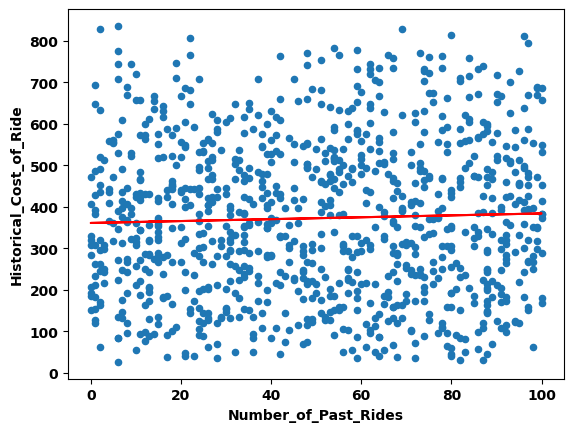

In [27]:
# Graficar los datos observados Modelo 1
datos.plot(kind='scatter', x = 'Number_of_Past_Rides', y = 'Historical_Cost_of_Ride')
# Graficar los datos predichos por el modelo 1 (línea de regresión)
plt.plot(pd.DataFrame(datos['Number_of_Past_Rides']), datos_predict, c = 'red', linewidth=1.5)

Como se observa en esta gráfica, los residuos están muy dispersos, significa que el modelo no está capturando bien la relación entre la variable independiente y la variable dependiente. Puede ser que la relación no sea lineal entre estas dos variables.

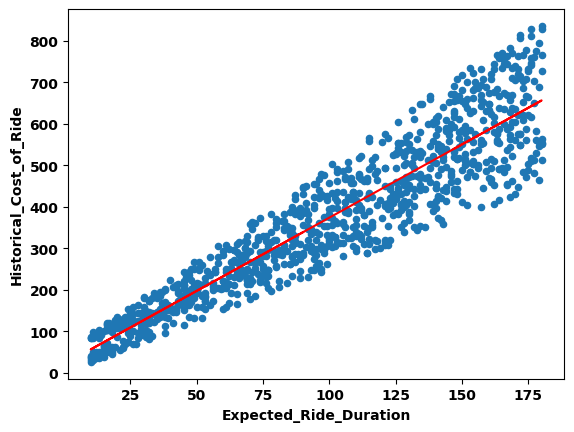

In [29]:
# Graficar los datos observados Modelo 2
datos.plot(kind='scatter', x = 'Expected_Ride_Duration', y = 'Historical_Cost_of_Ride')
# Graficar los datos predichos por el modelo 2 (línea de regresión)
plt.plot(pd.DataFrame(datos['Expected_Ride_Duration']), datos_predict_2, c = 'red', linewidth=1.5)

Para valores bajos de la variable independiente, el modelo predice bastante bien y los residuos son pequeños y cercanos a cero. El modelo tiene un buen ajuste en este rango.  
La variable dependiente crece significativamente con los valores de la variable independiente. Se puede observar una tendencia de los datos y el modelo sigue capturando la tendencia general de los datos.  
La dispersión de los residuos en valores más altos de x indica que hay más variabilidad o incertidumbre en las predicciones del modelo para estos valores.

* #### Obtener los residuos y valores ajustados, la gráfica correspondiente y el análisis de residuos.

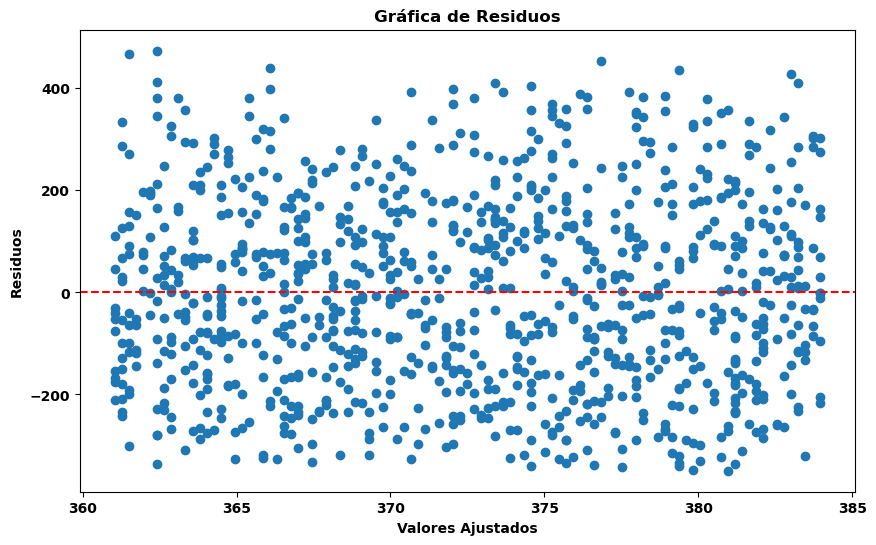

In [32]:
# Crear la gráfica de residuos del modelo 1
plt.figure(figsize=(10, 6))
plt.scatter(lm_1.fittedvalues, lm_1.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfica de Residuos')
plt.show()

Dispersión en valores bajos tanto como en valores altos de x. Esto indica que el modelo tiene dificultad en capturar la relación en todo el rango. La presencia de variabilidad en los residuos a lo largo de todo el rango de x sugiere que podrían faltar variables en el modelo, o que la relación entre x e y no es adecuadamente lineal.

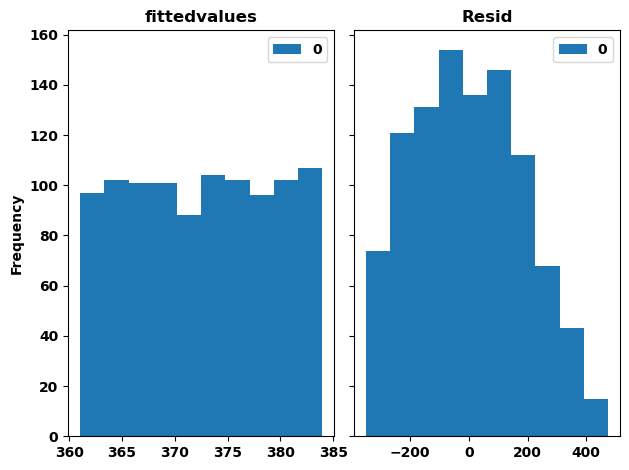

In [34]:
figure, axis = plt.subplots(1, 2, sharex = False, sharey = True) # Crear una figura para guardar los subplots
pd.DataFrame(lm_1.fittedvalues).plot(kind='hist', ax = axis[0], title='fittedvalues')
pd.DataFrame(lm_1.resid).plot(kind='hist', ax = axis[1], title='Resid')
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

* Gráfico de la izquierda (fittedvalues):

En este gráfico, se visualizan los valores ajustados (fitted values) de el modelo 1. Estos valores son las predicciones que el modelo hace sobre los datos observados.

El rango de los valores ajustados parece estar entre aproximadamente 360 y 385.
La distribución es uniforme, lo que da un indicio que los valores ajustados están relativamente distribuidos de manera similar en este rango.

* Gráfico de la derecha (Resid):

Aquí se muestran los residuos del modelo, que son la diferencia entre los valores observados y los valores ajustados.

La distribución de los residuos parece seguir una forma de campana, podrían estar distribuidos normalmente, pero con cierta asimetría, ya que hay más valores en el lado negativo (residuos menores a 0) que en el lado positivo.
Los residuos parecen variar entre aproximadamente -200 y 400, con una concentración en torno a 0, lo que indica que la mayoría de las predicciones no se desvían demasiado de los valores reales.

In [36]:
# Crear el DataFrame de residuos y valores ajustados con índice
residuos_lm_1 = pd.DataFrame({
    'index': range(len(lm_1.resid)),
    'resid': lm_1.resid
})

valores_ajustados_lm_1 = pd.DataFrame({
    'index': range(len(lm_1.fittedvalues)),
    'fittedvalues': lm_1.fittedvalues
})

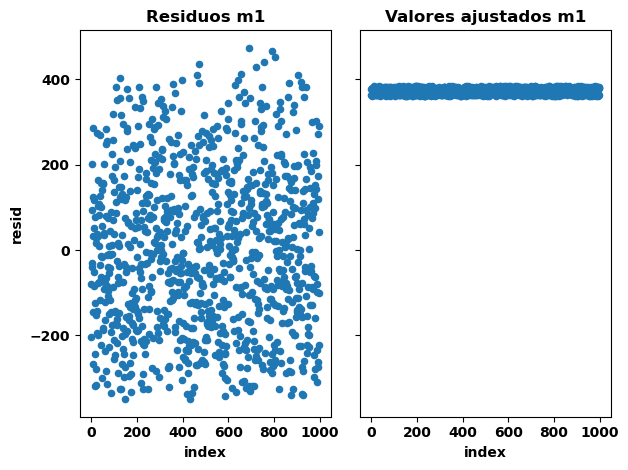

In [37]:
figure, axis = plt.subplots(1, 2, sharex = False, sharey = True) # Crear una figura para guardar los subplots
residuos_lm_1.plot(kind='scatter', x='index', y='resid', ax = axis[0], title='Residuos m1')
valores_ajustados_lm_1.plot(kind='scatter', x='index', y='fittedvalues', ax = axis[1], title='Valores ajustados m1')
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

* Gráfico de la izquierda (Residuos vs. Índice):
  
Eje X: Representa el índice o número de observaciones (del 0 al 1000).

Eje Y: Representa los residuos (residuales), es decir, la diferencia entre los valores observados y los valores ajustados por el modelo.

Los residuos parecen estar distribuidos simétricamente alrededor de cero, con valores que oscilan entre aproximadamente -200 y 400. Esto indica que no hay un sesgo evidente en las predicciones.
No se observa una tendencia o patrón creciente o decreciente, lo que sugiere que los residuos son independientes y distribuidos homogéneamente.

* Gráfico de la derecha (Valores ajustados vs. Índice):
  
Eje X: También muestra el índice de las observaciones (del 0 al 1000).

Eje Y: Representa los valores ajustados (predicciones del modelo).

En este gráfico, los valores ajustados están prácticamente en una misma línea horizontal, indicando que el modelo ajusta valores similares para todas las observaciones.

La falta de variabilidad en los valores ajustados (una línea prácticamente constante) sugiere que el modelo está produciendo resultados muy homogéneos, es decir, predice casi el mismo valor para todos los datos. Esto podría ser una señal de un problema con el modelo, ya que se esperaría que los valores ajustados tengan más variación si están bien ajustados a los datos observados.
Un patrón tan plano gpuede indicar que el modelo está subajustando (underfitting) los datos, es decir, que no está capturando bien la variabilidad presente en los datos reales.

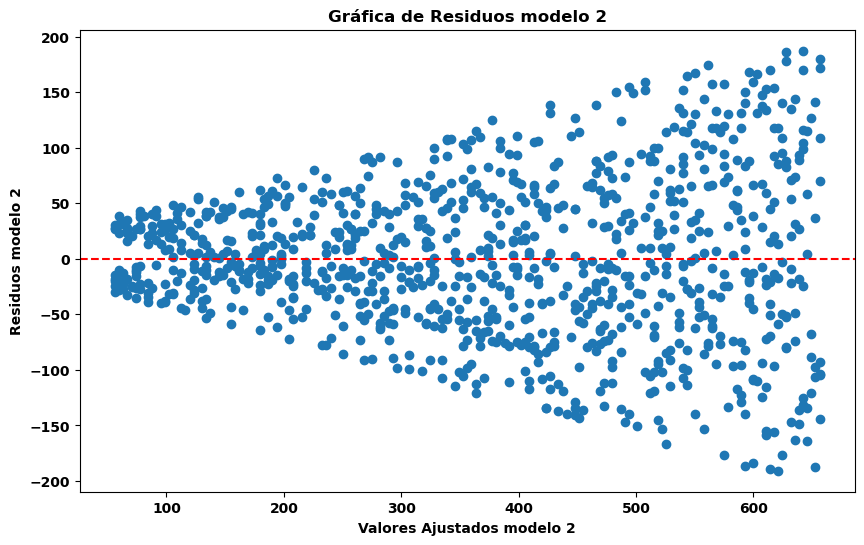

In [39]:
# Crear la gráfica de residuos Modelo 2
plt.figure(figsize=(10, 6))
plt.scatter(lm_2.fittedvalues, lm_2.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados modelo 2')
plt.ylabel('Residuos modelo 2')
plt.title('Gráfica de Residuos modelo 2')
plt.show()

Esta gráfica muestra como se comportan los residuos respecto a los valores predichos por el modelo 2.

Cuando los valores en el eje x (valores ajustados) son bajos, los residuos en el eje y están más cerca de la línea horizontal en cero. Esto indica que el modelo ajusta bien los datos en esa región, es decir, los errores entre los valores observados y los valores predichos son pequeños.

A medida que los valores ajustados en el eje x aumentan, los residuos (y) se dispersan más por encima y por debajo de la línea de cero. Esto indica que el modelo tiene un error de predicción mayor en esa región: los valores predichos se desvían más de los valores observados.

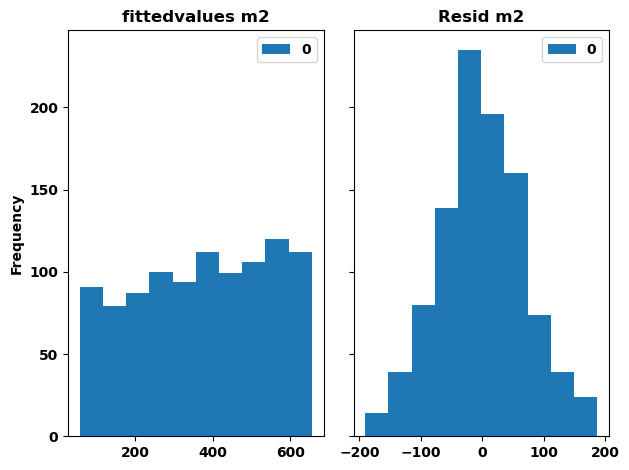

In [41]:
figure, axis = plt.subplots(1, 2, sharex = False, sharey = True) # Crear una figura para guardar los subplots
pd.DataFrame(lm_2.fittedvalues).plot(kind='hist', ax = axis[0], title='fittedvalues m2')
pd.DataFrame(lm_2.resid).plot(kind='hist', ax = axis[1], title='Resid m2')
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

* Gráfico de la izquierda (fittedvalues):

En este gráfico, se visualizan los valores ajustados (fitted values) de el modelo 1. Estos valores son las predicciones que el modelo hace sobre los datos observados.

El rango de los valores ajustados parece estar entre aproximadamente 0 y 650.
La distribución es uniforme, pero se evidencia una tendencia hacia valores mayores a 400 lo que da un indicio que los valores ajustados están relativamente distribuidos pero con cierta asimetría.

* Gráfico de la derecha (Resid):

Aquí se muestran los residuos del modelo, que son la diferencia entre los valores observados y los valores ajustados.

La distribución de los residuos parece seguir una forma de campana, podrían estar distribuidos normalmente, pero con cierta asimetría, ya que hay más valores en el lado positivo (residuos mayores a 0).
Los residuos parecen variar entre aproximadamente -200 y 200, con una concentración en torno a 0, lo que indica que la mayoría de las predicciones no se desvían demasiado de los valores reales.

In [43]:
# Crear el DataFrame de residuos y valores ajustados con índice
residuos_lm_2 = pd.DataFrame({
    'index': range(len(lm_2.resid)),
    'resid': lm_2.resid
})

valores_ajustados_lm_2 = pd.DataFrame({
    'index': range(len(lm_2.fittedvalues)),
    'fittedvalues': lm_2.fittedvalues
})

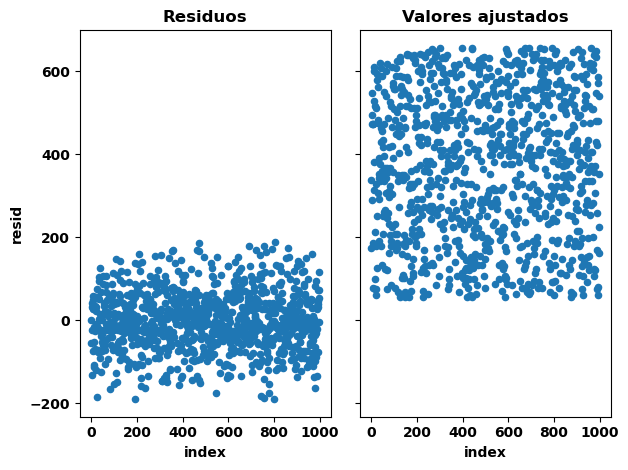

In [44]:
figure, axis = plt.subplots(1, 2, sharex = False, sharey = True) # Crear una figura para guardar los subplots
residuos_lm_2.plot(kind='scatter', x='index', y='resid', ax = axis[0], title='Residuos')
valores_ajustados_lm_2.plot(kind='scatter', x='index', y='fittedvalues', ax = axis[1], title='Valores ajustados')
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

* Valores Ajustados
  
Los valores ajustados son las predicciones del modelo para la variable dependiente basadas en los valores de la variable independientes. Es decir, son los valores que el modelo predice usando la fórmula de regresión.

Si los valores ajustados están cerca de los valores observados, significa que el modelo está haciendo un buen trabajo al predecir la variable dependiente.

Se usan para crear gráficas de línea para ver cómo de bien se ajusta el modelo a los datos reales.

* Residuos
  
Los residuos son las diferencias entre los valores observados y los valores ajustados. En esencia, miden el "error" o cuánto se desvía el modelo de los datos reales. Se calculan como: $Residuos = Valores Observados − Valores Ajustados$

* #### Extraer conclusiones del modelo de regresión simple.

* Modelo 1 Historical_Cost_of_Ride ~ Number_of_Past_Rides
    * R-cuadrado: El valor de $𝑅^{2}=0.001$ 
  indica que el modelo explica solo el 0.1% de la variabilidad en el costo histórico del viaje (Historical_Cost_of_Ride). El modelo tiene un ajuste muy pobre.
    * F-Statistic y Prob (F-statistic):
      El estadístico F de 1.285 con un valor p de 0.257 indica que el modelo en general no es significativo. Esto significa que no hay evidencia suficiente para afirmar que la variable Number_of_Past_Rides tiene una relación significativa con el costo histórico del viaje.
    * Intercepto: El coeficiente del intercepto es 361.05, lo que significa que, si el número de viajes pasados es cero, el costo histórico del viaje sería, en promedio, 361.05 unidades monetarias. Aunque este valor es significativo (p < 0.001), su relevancia práctica puede ser cuestionable, ya que un cliente que no ha realizado ningún viaje es poco probable.
    * Coeficiente de Number_of_Past_Rides: El coeficiente es 0.229, indica que por cada viaje pasado adicional, el costo del viaje aumenta en promedio 0.229 unidades monetarias. Sin embargo, dado que el valor p es 0.257, este coeficiente no es estadísticamente significativo, lo que indica que no hay una relación concluyente entre el número de viajes pasados y el costo histórico del viaje.
    * El modelo presenta un ajuste muy deficiente, explicando casi nada de la variabilidad en el costo de los viajes. La variable Number_of_Past_Rides no es un buen predictor del costo histórico del viaje en este caso. No hay relación clara entre el número de viajes pasados y el costo del viaje.


* Modelo 2 Historical_Cost_of_Ride ~ Expected_Ride_Duration

    * R-cuadrado: El valor de $𝑅^{2}=0.860$. Indica que el modelo explica el 86% de la variabilidad en la variable dependiente, que es el costo histórico del viaje (Historical_Cost_of_Ride). Es un ajuste muy bueno del modelo.
    * F-Statistic y Prob (F-statistic): El estadístico F de 6148 y la probabilidad asociada de 0.00 indican que el modelo es altamente significativo. Esto significa que la variable independiente Expected_Ride_Duration tiene una relación significativa con la variable dependiente Historical_Cost_of_Ride.
    * Intercepto: El coeficiente del intercepto es 20.87, significa que si la duración esperada del viaje (Expected_Ride_Duration) fuera cero, el costo histórico del viaje sería, en promedio, 20.87 unidades monetarias. Aunque este valor tiene sentido matemáticamente, en la práctica, un viaje de duración cero podría no tener relevancia.
    * Coeficiente de Expected_Ride_Duration: El coeficiente es 3.53, significa que por cada unidad de aumento en la duración esperada del viaje, el costo del viaje aumenta en promedio 3.53 unidades monetarias. Esto es estadísticamente significativo, dado que el valor p asociado a este coeficiente es 0.000, indicando que la relación es altamente significativa.
    * El modelo tiene un buen ajuste, explicando un alto porcentaje de la variabilidad en el costo del viaje. Además, la relación entre la duración esperada del viaje y el costo es fuerte y significativa.

### Regresión Lineal Múltiple.

Implementar un modelo de regresión múltiple teniendo como variable de respuesta el costo histórico del viaje y como variables independientes el número de pasajeros, número de conductores, número de viajes pasados y duración el viaje esperado, siga las siguientes actividades

In [51]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


##### Generar el modelo de regresión lineal múltiple

In [53]:
rlm = smf.ols(formula='Historical_Cost_of_Ride ~ Number_of_Riders + Number_of_Drivers + Number_of_Past_Rides + Expected_Ride_Duration',
              data = datos).fit()

In [54]:
rlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Historical_Cost_of_Ride   R-squared:                       0.862
Model:                                 OLS   Adj. R-squared:                  0.861
Method:                      Least Squares   F-statistic:                     1554.
Date:                     Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                             21:45:00   Log-Likelihood:                -5660.2
No. Observations:                     1000   AIC:                         1.133e+04
Df Residuals:                          995   BIC:                         1.135e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.4521      8.328      1.255      0.210      -5.890      26.794
Number_of_Riders          -0.0573      0.119     -0.480      0.631      -0.292       0.177
Number_of_Drivers          0.4325      0.148      2.913      0.004       0.141       0.724
Number_of_Past_Rides       0.0373      0.075      0.496      0.620      -0.110       0.185
Expected_Ride_Duration     3.5339      0.045     78.761      0.000       3.446       3.622
==============================================================================
Omnibus:                        0.084   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.959   Jarque-Bera (JB):                0.135
Skew:                           0.016   Prob(JB):                        0.935
Kurtosis:                       2.953   Cond. No.                         516.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* #### Calcular la ecuación de regresión, interpretar los coeficientes betas.

intercepto = $\alpha$  
Number_of_Rides = $x_0$ ; $\beta_{0}$  
Number_of_Drivers = $x_1$ ; $\beta_{1}$  
Number_of_Past_Rides  = $x_2$ ; $\beta_{2}$  
Expected_Ride_Duration = $x_3$ ; $\beta_{3}$  

La ecuación de regresión para el modelo es la siguiente:  
$$y = \alpha + \beta_{0}x_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3$$

De acuerdo con los valores entregados por el modelo, la ecuación quedaría de la siguiente manera:  
$$y = 10.4521 -0.0573x_0 + 0.4325x_1 + 0.0373x_2 + 3.5339x_3$$

* Interpretación de coeficientes
    - $\alpha$: cuando todas las variables independientes tienen un valor de cero, el costo del viaje tendrá un valor de 10.4521 unidades monetarias
    - $\beta_{0}$: por cada unidad que varíe ***Number_of_Rides***, el valor del costo del viaje varía -0.0573 unidades monetarias
    - $\beta_{1}$: por cada unidad que varíe ***Number_of_Drivers***, el valor del costo del viaje varía 0.4325 unidades monetarias
    - $\beta_{2}$: por cada unidad que varíe ***Number_of_Past_Rides***, el valor del costo del viaje varía 0.0373 unidades monetarias
    - $\beta_{3}$: por cada unidad que varíe ***Expected_Ride_Duration***, el valor del costo del viaje varía 3.5339 unidades monetarias


* #### Del resumen del modelo, indicar las variables significativas de acuerdo con el P-value.

In [59]:
p_values_rlm = rlm.pvalues
p_values_rlm

Intercept                 0.209729
Number_of_Riders          0.631353
Number_of_Drivers         0.003658
Number_of_Past_Rides      0.620354
Expected_Ride_Duration    0.000000
dtype: float64

Los p-valores ayudan a determinar la significancia estadística de cada variable en el modelo.

De acuerdo con la información que suministra el resumen del modelo, las variables significativas de acuerdo al p-valor son Number_of_Drivers con un p-valor de 0.003658 y Expected_Ride_Duration con un p-valor de 0.000000,, esto es porque el nivel de significancia que maneja el modelo es de 0.05 y el p-valor es inferior a este número.

Las variables significativas (Number_of_Drivers y Expected_Ride_Duration) son aquellas que aportan información valiosa para explicar la variabilidad en la variable dependiente en el modelo.

* #### Hacer la evaluación de modelo, con cada uno de sus componentes: RSE, RSEM, R-cuadrado, R-cuadrado ajustado.

##### Obtener $ŷ_i$: valores predichos

In [64]:
# Primero hacer una predicción con el modelo
y_pred_rlm = rlm.predict(datos[['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Expected_Ride_Duration']])
y_pred_rlm

0      343.293163
1      178.640336
2      290.028861
3      493.502876
4      544.807390
          ...    
995     58.277421
996    353.799338
997    154.865915
998    226.968564
999    553.234848
Length: 1000, dtype: float64

##### Calcular *MSE*

MSE (Mean Squared Error): Es el promedio de los errores al cuadrado entre los valores observados y los valores predichos. 

$MSE = \frac{1}{n} \sum (y_i - ŷ_i)^2$

In [66]:
# Calcular el MSE (Error Cuadrático Medio)
mse = np.mean((datos['Historical_Cost_of_Ride'] - y_pred_rlm) ** 2)
mse

4829.475748338188

##### Calcular *RSEM*

RSEM (Root Mean Squared Error): Es la raíz del error cuadrático medio, y mide lo bien que el modelo predice los datos de validación (si se tiene). Se calcula de manera similar al RSE, pero normalmente se utiliza sobre datos de validación.

El RSEM o RMSE (Raíz del Error Cuadrático Medio) es una medida de la precisión del modelo que se utiliza generalmente para evaluar la calidad de las predicciones. No se ajusta por los grados de libertad.

$RSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - ŷ_i)^2}$

In [68]:
# Calcular el RSEM (Raíz del Error Cuadrático Medio)
rsem = np.sqrt(mse)
rsem

69.49442962092853

##### Calcular *RSE*

RSE (Residual Standard Error): Es el error estándar residual. Mide la variabilidad de los datos que el modelo no logra explicar.
El RSE es una medida del ajuste de un modelo de regresión, que indica la desviación estándar de los residuos (diferencias entre los valores observados y los valores predichos).

RSE ajusta por el número de predictores restando los grados de libertad (k-1) y es una mejor representación del error estándar residual cuando se tiene múltiples predictores en un modelo

$RSE = \sqrt{\frac{1}{n-k-1} \sum_{i=1}^{n} (y_i - ŷ_i)^2}$

In [70]:
var_mod = datos[['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Expected_Ride_Duration']]
n = len(y_pred_rlm) # Número de observaciones
k = var_mod.shape[1] # Número de variabls predictoras

In [71]:
rse = np.sqrt(np.sum((datos['Historical_Cost_of_Ride'] - y_pred_rlm)**2) / (n-k-1))
rse

69.66881993181488

#### Usando los parámetros que retorna la función ols()

.scale ajusta por el número de predictores restando los grados de libertad

In [73]:
#Equivalente
#sum((datos['Historical_Cost_of_Ride'] - y_pred_rlm) ** 2)/(n-k-1)
MSE = rlm.scale
MSE

4853.744470691645

In [74]:
RSEM = np.sqrt(MSE)
RSEM

69.66881993181487

#### $R^2$

R-cuadrado (R²): Indica qué porcentaje de la variación en la variable dependiente es explicada por las variables independientes. Va de 0 a 1, donde 1 significa que el modelo explica toda la variabilidad:

$R^2 = 1 - \frac{\sum(y_i - ŷ_i)^2}{\sum(y_i - ȳ_i)^2}$

$R^2 = 1 - \frac{SSR}{SST}$


##### Calcular la media de los valores observados

In [77]:
y_mean = np.mean(datos['Historical_Cost_of_Ride'])

##### Calcular SST

SST (Suma Total de los Cuadrados): Es la suma de las diferencias al cuadrado entre los valores observados y la media de los valores observados.

$SST = \sum_{i=1}^{n}(y_i - ȳ_i)^2$

In [79]:
SST = np.sum((datos['Historical_Cost_of_Ride'] - y_mean)**2)
SST

34993371.62985484

##### Calcular SSR

SSR (Suma de los Cuadrados de los Residuos): Es la suma de las diferencias al cuadrado entre los valores observados y los valores predichos por el modelo.

$SSR = \sum_{i=1}^{n}(y_i - ŷ_i)^2$

In [81]:
SSR = np.sum((datos['Historical_Cost_of_Ride'] - y_pred_rlm)**2)
SSR

4829475.748338188

##### Calcular $R^2$

In [83]:
R2 = 1 - (SSR/SST)
R2

0.8619888417891722

##### Usando los parámetros que retorna la función ols(), para obtener $R^2$

In [85]:
rlm.rsquared

0.8619888417891723

#### $R^2_{ajustado}$
R-cuadrado ajustado (Adjusted R²): Es similar al R², pero ajusta el valor en función del número de predictores. Penaliza el aumento de predictores irrelevantes que no mejoran el modelo.

$R^2_{ajustado}=1-(\frac{(1-R^2)(n-1)}{n-k-1})$

In [87]:
R2_adjs = 1-(((1-R2)*(n-1))/(n-k-1))
R2_adjs

0.8614340230626966

##### Usando los parámetros que retorna la función ols(), para obtener $R^2_{ajustado}$

In [89]:
rlm.rsquared_adj

0.8614340230626967

* #### Extraer conclusiones del modelo de regresión múltiple.

* Para la evaluación general del modelo se utiliza $R^2$ 
    * El R² indica qué proporción de la variabilidad total de la variable dependiente es explicada por las variables predictoras. Un valor alto de R² (cercano a 1) indica que el modelo explica bien la variabilidad de los datos.
    * El R² ajustado es similar, pero ajusta el valor según el número de variables predictoras para evitar el sobreajuste. Si el R² ajustado es significativamente menor que el R², puede indicar que algunas variables no son relevantes.
    *  El modelo tiene un R² de 0.8619, lo que indica que el 86.14% de la variabilidad en la variable dependiente está explicada por las variables predictoras. El R² ajustado es similar (0.8614), lo que sugiere que no hay sobreajuste significativo.
* Significancia Estadística de las Variables se determina con el p-value
    * Los p-valores en la tabla de coeficientes indican si cada variable predictora tiene un efecto significativo en la variable dependiente. Un p-valor inferior a 0.05 indica que la variable es estadísticamente significativa al 95% de confianza.
    * Si una variable tiene un p-valor alto (mayor que 0.05), se podría concluir que no tiene un impacto significativo en la variable dependiente y podría eliminarse del modelo.
    * La variable Expected_Ride_Duration es altamente significativa (p < 0.001) y tiene un impacto muy grande en la variable dependiente, con un coeficiente de 3.53, lo que significa que un aumento en la duración del viaje incrementa fuertemente el valor predicho.
    * Number_of_Riders y Number_of_Past_Rides no son estadísticamente significativas (p > 0.05), por lo que podrían eliminarse del modelo.
* Errores estándar y confianza
    * Errores estándar y intervalos de confianza:
Los errores estándar asociados a cada coeficiente indican la precisión de la estimación. Valores bajos implican estimaciones más precisas.
    * Los intervalos de confianza (IC) muestran un rango dentro del cual se espera que esté el valor real del coeficiente con cierto nivel de confianza (por ejemplo, 95%).
* Diagnóstico de los residuos
    * RSE (Error Estándar Residual):
El RSE mide la variación en los datos que no es explicada por el modelo. Valores bajos indican que los residuos son pequeños y, por lo tanto, el modelo ajusta bien los datos.
    * Un RSE bajo indica un buen ajuste, mientras que un RSE alto indica que el modelo no explica bien las variaciones en la variable dependiente.
    * El RSE de 69.67 indica que, en promedio, el modelo predice los valores del costo del viaje con un error de aproximadamente 69.67 unidades.

## Regresión logística.

Implementar un modelo de regresión logística con datos de entrenamiento del 70%, que obtenga la probabilidad de ser un servicio regular o excelente con el promedio de calificación (diseñar una variable dummy donde cero – servicio regular por debajo de 4 y los demás son 1 – excelente servicio), teniendo en cuenta las variables ubicación, estado de lealtad del cliente, hora de reserva y tipo de vehículo.

#### Definir las variables independientes que se van a trabajar en el modelo

In [96]:
# Establecer las variables independientes
X_features = datos[['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type']]

#### diseñar una variable dummy donde cero – servicio regular por debajo de 4 y los demás son 1 – excelente servicio

In [98]:
datos['Service_Ratings'] = datos['Average_Ratings'].apply(lambda x: 0 if x <= 4 else 1)

#### Convertir las variables independientes a dummies, ya que son categóricas

In [100]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
# Convertir variables categóricas a numéricas usando OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False) # elimina la primer variable dummy de cada una de las generadas y mantener los ceros
X_encoded = encoder.fit_transform(X_features)

In [102]:
# Obtener los nombres de las nuevas columnas después de la codificación
column_names = encoder.get_feature_names_out(X_features.columns)

In [103]:
# Convertir el resultado a un DataFrame de pandas con nombres de columnas, ya que onehotencoder retorna un array (sin nombres de cols)
X = pd.DataFrame(X_encoded, columns=column_names)

In [104]:
X.head()

,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Definir la variable dependiente Y para el modelo

In [106]:
Y = datos['Service_Ratings']

#### Dividir el conjunto de datos en entrenamiento y prueba

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=000)

In [110]:
x_train.head()

,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
434,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


#### Implementar el modelo de regresión logística usando statsmodel.api

In [112]:
import statsmodels.api as sm

In [113]:
logit_model = sm.Logit(y_train, x_train)

In [114]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.627063
         Iterations 5


In [115]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Service_Ratings   No. Observations:                  700
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            7
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:              -0.0003090
Time:                        21:45:04   Log-Likelihood:                -438.94
converged:                       True   LL-Null:                       -438.81
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Location_Category_Suburban          0.3540      0.189      1.870      0.061      -0.017       0.725
Location_Category_Urban             0.4689      0.179      2.618      0.009       0.118       0.820
Customer_Loyalty_Status_Regular     0.3798      0.186      2.040      0.041       0.015       0.745
Customer_Loyalty_Status_Silver      0.4641      0.176      2.638      0.008       0.119       0.809
Time_of_Booking_Evening            -0.2203      0.202     -1.090      0.276      -0.616       0.176
Time_of_Booking_Morning             0.3743      0.207      1.808      0.071      -0.032       0.780
Time_of_Booking_Night              -0.0178      0.190     -0.094      0.925      -0.389       0.354
Vehicle_Type_Premium                0.1364      0.152      0.899      0.369      -0.161       0.434
===================================================================================================
"""

#### Interpretar los Odds Ratios en cada uno de los factores.

In [117]:
# Obtener los coeficientes (log-odds)
log_odds = result.params
log_odds

Location_Category_Suburban         0.354019
Location_Category_Urban            0.468921
Customer_Loyalty_Status_Regular    0.379818
Customer_Loyalty_Status_Silver     0.464109
Time_of_Booking_Evening           -0.220282
Time_of_Booking_Morning            0.374302
Time_of_Booking_Night             -0.017796
Vehicle_Type_Premium               0.136421
dtype: float64

In [118]:
# Convertir a odds ratios
odds_ratios = np.exp(log_odds)
odds_ratios

Location_Category_Suburban         1.424782
Location_Category_Urban            1.598268
Customer_Loyalty_Status_Regular    1.462018
Customer_Loyalty_Status_Silver     1.590596
Time_of_Booking_Evening            0.802293
Time_of_Booking_Morning            1.453976
Time_of_Booking_Night              0.982362
Vehicle_Type_Premium               1.146164
dtype: float64

#### Validar el modelo de regresión logística, usando el resumen del modelo e interpretando los p-values de cada variable independiente, interpretar cada resultado.

In [120]:
result.pvalues

Location_Category_Suburban         0.061478
Location_Category_Urban            0.008851
Customer_Loyalty_Status_Regular    0.041328
Customer_Loyalty_Status_Silver     0.008329
Time_of_Booking_Evening            0.275830
Time_of_Booking_Morning            0.070667
Time_of_Booking_Night              0.925204
Vehicle_Type_Premium               0.368658
dtype: float64

In [121]:
# Intervalos de confianza de los coeficientes (log-odds)
conf = result.conf_int()

# Añadimos los coeficientes al DataFrame de intervalos de confianza
conf['Odds Ratio'] = odds_ratios

# Añadimos los coeficientes al DataFrame de intervalos de confianza
conf['p-value'] = result.pvalues

# Exponenciamos los intervalos de confianza para obtenerlos en términos de odds ratios
conf.columns = ['2.5%', '97.5%', 'Odds Ratio', 'p-values']
conf['2.5%'] = np.exp(conf['2.5%'])
conf['97.5%'] = np.exp(conf['97.5%'])

# Mostramos los intervalos de confianza y odds ratios
print(conf)

                                     2.5%     97.5%  Odds Ratio  p-values
Location_Category_Suburban       0.983120  2.064857    1.424782  0.061478
Location_Category_Urban          1.125051  2.270528    1.598268  0.008851
Customer_Loyalty_Status_Regular  1.015054  2.105796    1.462018  0.041328
Customer_Loyalty_Status_Silver   1.126759  2.245375    1.590596  0.008329
Time_of_Booking_Evening          0.539844  1.192332    0.802293  0.275830
Time_of_Booking_Morning          0.968945  2.181803    1.453976  0.070667
Time_of_Booking_Night            0.677518  1.424367    0.982362  0.925204
Vehicle_Type_Premium             0.851291  1.543177    1.146164  0.368658


#### Diseñar la matriz de confusión y calcular las métricas de evaluación del modelo, con los datos de prueba o 30% de los datos no entrenados, interpretar los resultados.

* Predecir probabilidades con los datos de prueba

In [124]:
y_pred_prob = result.predict(x_test)

* Convertir probabilidades en predicciones binarias (0 o 1)

In [126]:
y_pred_log = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

* Crear la matriz de confusión

In [128]:
from sklearn.metrics import confusion_matrix

In [129]:
conf_matrix = confusion_matrix(y_test, y_pred_log)
conf_matrix

array([[  4,  90],
       [ 11, 195]], dtype=int64)

* Calcular las métricas del modelo

In [131]:
from sklearn.metrics import classification_report

In [132]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.27      0.04      0.07        94
           1       0.68      0.95      0.79       206

    accuracy                           0.66       300
   macro avg       0.48      0.49      0.43       300
weighted avg       0.55      0.66      0.57       300



#### Extraer conclusiones del modelo de regresión logit.

### Pruebas para seleccionar variables

#### Lasso (L1)

In [136]:
datos

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Service_Ratings
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,0
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,1
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,0
...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526,1
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987,1
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830,1
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048,0


In [137]:
X

,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
996,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
997,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
998,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logit_lasso = LogisticRegression(penalty='l1', solver='liblinear')

In [140]:
logit_lasso.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [141]:
print(f'Coeficientes: {logit_lasso.coef_}')

Coeficientes: [[ 0.06605307  0.17050019  0.04917491  0.13013966 -0.53710061  0.
  -0.34562791 -0.03384324]]


eliminar la variable cuyo coeficiente es 0, ya que laprueba lasso indica que no aporta significativamente nada para el modelo

In [143]:
X = X.drop('Time_of_Booking_Morning', axis=1)

In [144]:
X

,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Night,Vehicle_Type_Premium
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,0.0,1.0,1.0,0.0,0.0,0.0,1.0
997,1.0,0.0,0.0,0.0,0.0,1.0,1.0
998,1.0,0.0,1.0,0.0,0.0,1.0,1.0


dividir nuevamente los datos en train y test

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=000)

In [147]:
x_train.shape

(700, 7)

Entrenar de nuevo el modelo

In [149]:
logit_model_2 = sm.Logit(y_train, x_train)

In [150]:
result_2 = logit_model_2.fit()

Optimization terminated successfully.
         Current function value: 0.629442
         Iterations 5


In [151]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Service_Ratings   No. Observations:                  700
Model:                          Logit   Df Residuals:                      693
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:               -0.004104
Time:                        21:45:06   Log-Likelihood:                -440.61
converged:                       True   LL-Null:                       -438.81
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Location_Category_Suburban          0.4300      0.184      2.337      0.019       0.069       0.791
Location_Category_Urban             0.5445      0.174      3.136      0.002       0.204       0.885
Customer_Loyalty_Status_Regular     0.4368      0.183      2.388      0.017       0.078       0.795
Customer_Loyalty_Status_Silver      0.5351      0.171      3.130      0.002       0.200       0.870
Time_of_Booking_Evening            -0.3410      0.192     -1.774      0.076      -0.718       0.036
Time_of_Booking_Night              -0.1358      0.179     -0.758      0.448      -0.487       0.215
Vehicle_Type_Premium                0.1909      0.148      1.286      0.198      -0.100       0.482
===================================================================================================
"""

##### Evaluar el modelo lasso

In [153]:
# Obtener los coeficientes (log-odds)
log_odds_2 = result_2.params

In [154]:
# Convertir a odds ratios
odds_ratios_2 = np.exp(log_odds_2)

In [155]:
result_2.pvalues

Location_Category_Suburban         0.019431
Location_Category_Urban            0.001714
Customer_Loyalty_Status_Regular    0.016922
Customer_Loyalty_Status_Silver     0.001745
Time_of_Booking_Evening            0.076033
Time_of_Booking_Night              0.448329
Vehicle_Type_Premium               0.198381
dtype: float64

In [156]:
# Intervalos de confianza de los coeficientes (log-odds)
conf_2 = result_2.conf_int()

# Añadimos los coeficientes al DataFrame de intervalos de confianza
conf_2['Odds Ratio'] = odds_ratios_2

# Exponenciamos los intervalos de confianza para obtenerlos en términos de odds ratios
conf_2.columns = ['2.5%', '97.5%', 'Odds Ratio']
conf_2['2.5%'] = np.exp(conf_2['2.5%'])
conf_2['97.5%'] = np.exp(conf_2['97.5%'])

# Mostramos los intervalos de confianza y odds ratios
print(conf_2)

                                     2.5%     97.5%  Odds Ratio
Location_Category_Suburban       1.071859  2.204628    1.537221
Location_Category_Urban          1.226509  2.422591    1.723754
Customer_Loyalty_Status_Regular  1.081502  2.214914    1.547719
Customer_Loyalty_Status_Silver   1.221499  2.387249    1.707636
Time_of_Booking_Evening          0.487862  1.036354    0.711054
Time_of_Booking_Night            0.614536  1.240189    0.873007
Vehicle_Type_Premium             0.904843  1.618894    1.210308


In [157]:
y_pred_prob_2 = result_2.predict(x_test)

In [158]:
y_pred_log_2 = [1 if prob_2 > 0.5 else 0 for prob_2 in y_pred_prob_2]

In [159]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_log_2)
conf_matrix_2

array([[  6,  88],
       [ 14, 192]], dtype=int64)

In [160]:
print(classification_report(y_test, y_pred_log_2))

              precision    recall  f1-score   support

           0       0.30      0.06      0.11        94
           1       0.69      0.93      0.79       206

    accuracy                           0.66       300
   macro avg       0.49      0.50      0.45       300
weighted avg       0.56      0.66      0.58       300



##### Generar un nuevo modelo con las variables establecidas por lasso

In [162]:
# Establecer las variables predictoras finales
X_final = X[['Location_Category_Suburban','Location_Category_Urban', 
             'Customer_Loyalty_Status_Regular', 'Customer_Loyalty_Status_Silver']]

In [163]:
X_final

,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver
0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
995,0.0,1.0,0.0,0.0
996,0.0,1.0,1.0,0.0
997,1.0,0.0,0.0,0.0
998,1.0,0.0,1.0,0.0


In [164]:
# Dividir de nuevo los datos
x_train, x_test, y_train, y_test = train_test_split(X_final, Y, test_size=0.3, random_state=000)

In [165]:
x_train.shape

(700, 4)

In [166]:
# entrenar al modelo final
logit_model_f = sm.Logit(y_train, x_train)

In [167]:
result_f = logit_model_f.fit()

Optimization terminated successfully.
         Current function value: 0.632369
         Iterations 5


In [168]:
result_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Service_Ratings   No. Observations:                  700
Model:                          Logit   Df Residuals:                      696
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:               -0.008773
Time:                        21:45:07   Log-Likelihood:                -442.66
converged:                       True   LL-Null:                       -438.81
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Location_Category_Suburban          0.4278      0.175      2.442      0.015       0.084       0.771
Location_Category_Urban             0.5413      0.162      3.350      0.001       0.225       0.858
Customer_Loyalty_Status_Regular     0.4215      0.172      2.450      0.014       0.084       0.759
Customer_Loyalty_Status_Silver      0.5086      0.160      3.177      0.001       0.195       0.822
===================================================================================================
"""

In [169]:
# evaluar el modelo final
y_pred_prob_f = result_f.predict(x_test)

In [170]:
y_pred_log_f = [1 if prob_f > 0.5 else 0 for prob_f in y_pred_prob_f]

In [171]:
conf_matrix_f = confusion_matrix(y_test, y_pred_log_f)
conf_matrix_f

array([[ 10,  84],
       [ 22, 184]], dtype=int64)

In [172]:
print(classification_report(y_test, y_pred_log_f))

              precision    recall  f1-score   support

           0       0.31      0.11      0.16        94
           1       0.69      0.89      0.78       206

    accuracy                           0.65       300
   macro avg       0.50      0.50      0.47       300
weighted avg       0.57      0.65      0.58       300



In [173]:
# generar datos para ua predicción nueva
clasificacion = pd.DataFrame({
    'Location_Category_Suburban':[0],
    'Location_Category_Urban':[1],
    'Customer_Loyalty_Status_Regular':[0],
    'Customer_Loyalty_Status_Silver':[1]
})

In [174]:
clasificacion

,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver
0,0,1,0,1


In [175]:
y_pred_prob_nw = result_f.predict(clasificacion)

In [176]:
y_pred_log_nueva = [1 if prob_nw > 0.5 else 0 for prob_nw in y_pred_prob_nw]

In [177]:
if y_pred_log_nueva[0] == 1:
    print('Calificación Excelente')
else:
    print('Calificacion regular')

Calificación Excelente


### Probar un modelo con variables diferentes

#### Modelo 1

In [180]:
datos.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride', 'Service_Ratings'],
      dtype='object')

In [181]:
datos_num = datos[['Number_of_Riders', 'Number_of_Drivers', 
                   'Number_of_Past_Rides','Expected_Ride_Duration', 'Service_Ratings' ]]

In [182]:
type(datos_num)

pandas.core.frame.DataFrame

In [183]:
# Convertir variables categóricas a numéricas usando OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False) # elimina la primer variable dummy de cada una de las generadas y mantener los ceros
X_encoded_new = encoder.fit_transform(X_features)

In [184]:
# Obtener los nombres de las nuevas columnas después de la codificación
column_names = encoder.get_feature_names_out(X_features.columns)

In [185]:
# Convertir el resultado a un DataFrame de pandas con nombres de columnas, ya que onehotencoder retorna un array (sin nombres de cols)
X_lasso = pd.DataFrame(X_encoded_new, columns=column_names)

In [186]:
X_lasso

,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
996,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
997,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
998,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [187]:
df_new_lasso = pd.concat([datos_num, X_lasso], axis=1)

In [188]:
df_new_lasso

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Expected_Ride_Duration,Service_Ratings,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,90,45,13,90,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,58,39,72,43,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,42,31,0,76,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,89,28,67,134,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,78,22,74,149,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,24,11,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
996,84,29,92,94,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
997,44,6,80,40,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
998,53,27,78,58,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [189]:
X_new_lasso = df_new_lasso.drop('Service_Ratings', axis=1)

In [190]:
Y_new_lasso = df_new_lasso['Service_Ratings']

In [191]:
# Dividir de nuevo los datos
x_train, x_test, y_train, y_test = train_test_split(X_new_lasso, Y_new_lasso, test_size=0.3, random_state=000)

In [192]:
# entrenar al modelo final
logit_lasso_new = LogisticRegression(penalty='l1', solver='liblinear')

In [193]:
logit_lasso_new.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [194]:
print(f'Coeficientes: {logit_lasso_new.coef_}')

Coeficientes: [[ 0.00318409  0.00106272 -0.00773251 -0.00195846  0.07216666  0.17924596
   0.0530543   0.15505242 -0.52151318  0.         -0.33578829 -0.03606259]]


In [195]:
X_lasso = X_new_lasso.drop(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Expected_Ride_Duration', 'Time_of_Booking_Morning'], axis=1)

In [196]:
X_lasso.shape

(1000, 7)

In [197]:
Y_lasso = df_new_lasso['Service_Ratings']

In [198]:
Y_lasso.shape

(1000,)

In [199]:
# Dividir de nuevo los datos
x_train, x_test, y_train, y_test = train_test_split(X_lasso, Y_lasso, test_size=0.3, random_state=000)

In [200]:
# entrenar al modelo final
logit_model_lasso= sm.Logit(y_train, x_train)

In [201]:
result_lasso = logit_model_lasso.fit()

Optimization terminated successfully.
         Current function value: 0.629442
         Iterations 5


In [202]:
result_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Service_Ratings   No. Observations:                  700
Model:                          Logit   Df Residuals:                      693
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:               -0.004104
Time:                        21:45:08   Log-Likelihood:                -440.61
converged:                       True   LL-Null:                       -438.81
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Location_Category_Suburban          0.4300      0.184      2.337      0.019       0.069       0.791
Location_Category_Urban             0.5445      0.174      3.136      0.002       0.204       0.885
Customer_Loyalty_Status_Regular     0.4368      0.183      2.388      0.017       0.078       0.795
Customer_Loyalty_Status_Silver      0.5351      0.171      3.130      0.002       0.200       0.870
Time_of_Booking_Evening            -0.3410      0.192     -1.774      0.076      -0.718       0.036
Time_of_Booking_Night              -0.1358      0.179     -0.758      0.448      -0.487       0.215
Vehicle_Type_Premium                0.1909      0.148      1.286      0.198      -0.100       0.482
===================================================================================================
"""

In [203]:
# evaluar el modelo 
y_pred_prob_lasso = result_lasso.predict(x_test)

In [204]:
y_pred_log_lasso = [1 if prob_lasso > 0.5 else 0 for prob_lasso in y_pred_prob_lasso]

In [205]:
conf_matrix_lasso = confusion_matrix(y_test, y_pred_log_lasso)
conf_matrix_lasso

array([[  6,  88],
       [ 14, 192]], dtype=int64)

In [206]:
print(classification_report(y_test, y_pred_log_lasso))

              precision    recall  f1-score   support

           0       0.30      0.06      0.11        94
           1       0.69      0.93      0.79       206

    accuracy                           0.66       300
   macro avg       0.49      0.50      0.45       300
weighted avg       0.56      0.66      0.58       300



In [207]:
X_new_lasso.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Expected_Ride_Duration', 'Location_Category_Suburban',
       'Location_Category_Urban', 'Customer_Loyalty_Status_Regular',
       'Customer_Loyalty_Status_Silver', 'Time_of_Booking_Evening',
       'Time_of_Booking_Morning', 'Time_of_Booking_Night',
       'Vehicle_Type_Premium'],
      dtype='object')

#### Graficar la curva ROC del modelo1

In [209]:
from sklearn.metrics import roc_curve, roc_auc_score

#### calcular valores para la curva ROC

In [211]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lasso)

In [212]:
roc_auc = roc_auc_score(y_test, y_pred_prob_lasso)

#### Graficar la curva

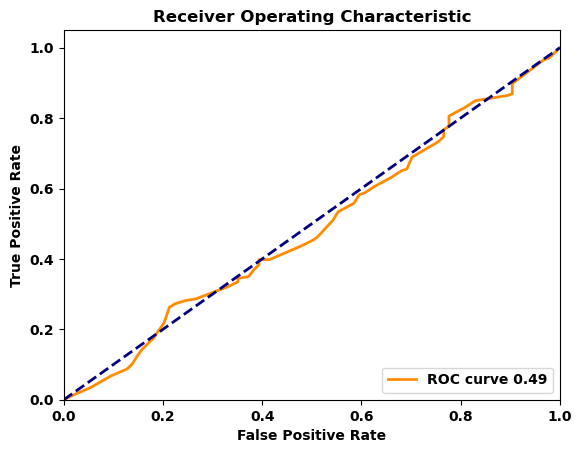

In [214]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [215]:
Y.value_counts()

Service_Ratings
1    682
0    318
Name: count, dtype: int64

In [216]:
y_train.value_counts()

Service_Ratings
1    476
0    224
Name: count, dtype: int64

como hay desbalanceo de clases se aplica SMOTE

In [218]:
!pip install imbalanced-learn

In [219]:
from imblearn.over_sampling import SMOTE

In [220]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [221]:
# entrenar al modelo final
logit_model_lasso= sm.Logit(y_train_balanced, x_train_balanced)

In [222]:
y_train_balanced.value_counts()

Service_Ratings
1    476
0    476
Name: count, dtype: int64

In [223]:
result_lasso = logit_model_lasso.fit()

Optimization terminated successfully.
         Current function value: 0.684885
         Iterations 4


In [224]:
result_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Service_Ratings   No. Observations:                  952
Model:                          Logit   Df Residuals:                      945
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                 0.01192
Time:                        21:45:19   Log-Likelihood:                -652.01
converged:                       True   LL-Null:                       -659.88
Covariance Type:            nonrobust   LLR p-value:                   0.01527
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Location_Category_Suburban          0.1670      0.153      1.094      0.274      -0.132       0.466
Location_Category_Urban             0.2069      0.143      1.444      0.149      -0.074       0.488
Customer_Loyalty_Status_Regular     0.0758      0.151      0.503      0.615      -0.220       0.371
Customer_Loyalty_Status_Silver      0.1465      0.139      1.055      0.291      -0.126       0.419
Time_of_Booking_Evening            -0.5087      0.158     -3.212      0.001      -0.819      -0.198
Time_of_Booking_Night              -0.4125      0.143     -2.881      0.004      -0.693      -0.132
Vehicle_Type_Premium                0.0245      0.120      0.204      0.839      -0.212       0.261
===================================================================================================
"""

In [225]:
# evaluar el modelo final
y_pred_prob_lasso = result_lasso.predict(x_test)

In [226]:
y_pred_log_lasso = [1 if prob_lasso > 0.5 else 0 for prob_lasso in y_pred_prob_lasso]

In [227]:
print(classification_report(y_test, y_pred_log_lasso))

              precision    recall  f1-score   support

           0       0.32      0.53      0.40        94
           1       0.69      0.48      0.57       206

    accuracy                           0.50       300
   macro avg       0.51      0.51      0.48       300
weighted avg       0.58      0.50      0.51       300



In [228]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lasso)

In [229]:
roc_auc = roc_auc_score(y_test, y_pred_prob_lasso)

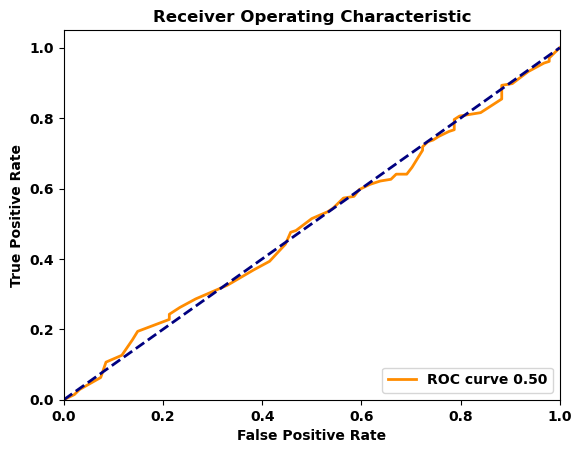

In [230]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [231]:
x_train_balanced

,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Night,Vehicle_Type_Premium
0,0.0,0.0,0.00000,0.0,0.0,0.0,1.000000
1,0.0,1.0,1.00000,0.0,0.0,1.0,0.000000
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.00000,0.0,1.0,0.0,0.000000
4,0.0,0.0,0.00000,1.0,0.0,1.0,1.000000
...,...,...,...,...,...,...,...
947,0.0,1.0,0.83032,0.0,0.0,0.0,0.000000
948,0.0,0.0,0.00000,1.0,1.0,0.0,0.353152
949,0.0,1.0,0.00000,1.0,0.0,1.0,0.000000
950,0.0,0.0,1.00000,0.0,0.0,0.0,0.000000


#### Modelo 2

In [233]:
datos_num = datos[['Number_of_Riders', 'Number_of_Drivers', 
                   'Number_of_Past_Rides','Expected_Ride_Duration', 'Service_Ratings' ]]

In [234]:
X_lasso

,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Night,Vehicle_Type_Premium
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,0.0,1.0,1.0,0.0,0.0,0.0,1.0
997,1.0,0.0,0.0,0.0,0.0,1.0,1.0
998,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [235]:
df_new_lasso = df_new_lasso[['Location_Category_Suburban','Location_Category_Urban',
                            'Customer_Loyalty_Status_Regular', 'Customer_Loyalty_Status_Silver']]	

In [236]:
# Dividir de nuevo los datos
x_train, x_test, y_train, y_test = train_test_split(df_new_lasso, Y_lasso, test_size=0.3, random_state=000)

In [237]:
# entrenar al modelo final
logit_model_lasso= sm.Logit(y_train, x_train)

In [238]:
result_lasso = logit_model_lasso.fit()

Optimization terminated successfully.
         Current function value: 0.632369
         Iterations 5


In [239]:
result_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Service_Ratings   No. Observations:                  700
Model:                          Logit   Df Residuals:                      696
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:               -0.008773
Time:                        21:45:20   Log-Likelihood:                -442.66
converged:                       True   LL-Null:                       -438.81
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Location_Category_Suburban          0.4278      0.175      2.442      0.015       0.084       0.771
Location_Category_Urban             0.5413      0.162      3.350      0.001       0.225       0.858
Customer_Loyalty_Status_Regular     0.4215      0.172      2.450      0.014       0.084       0.759
Customer_Loyalty_Status_Silver      0.5086      0.160      3.177      0.001       0.195       0.822
===================================================================================================
"""

In [240]:
# evaluar el modelo final
y_pred_prob_lasso = result_lasso.predict(x_test)

In [241]:
y_pred_log_lasso = [1 if prob_lasso > 0.5 else 0 for prob_lasso in y_pred_prob_lasso]

In [242]:
conf_matrix_lasso = confusion_matrix(y_test, y_pred_log_lasso)
conf_matrix_lasso

array([[ 10,  84],
       [ 22, 184]], dtype=int64)

In [243]:
print(classification_report(y_test, y_pred_log_lasso))

              precision    recall  f1-score   support

           0       0.31      0.11      0.16        94
           1       0.69      0.89      0.78       206

    accuracy                           0.65       300
   macro avg       0.50      0.50      0.47       300
weighted avg       0.57      0.65      0.58       300



In [244]:
from sklearn.model_selection import KFold, cross_val_score

In [245]:
X = df_new_lasso
Y = Y_lasso

In [246]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
modelo = LogisticRegression()

In [247]:
scores = cross_val_score(modelo, X, Y, cv=kf, scoring='accuracy')
print("Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Scores: [0.715 0.65  0.74  0.635 0.67 ]
Mean Accuracy: 0.682


#### Modelo 3

In [249]:
datos['Service_Ratings'] = datos['Average_Ratings'].apply(lambda x: 0 if x <= 3.8 else 1)

In [250]:
Y = datos['Service_Ratings']

In [251]:
Y.value_counts()

Service_Ratings
1    788
0    212
Name: count, dtype: int64

In [252]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
modelo = LogisticRegression()

In [253]:
scores = cross_val_score(modelo, X, Y, cv=kf, scoring='accuracy')
print("Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Scores: [0.79 0.76 0.82 0.78 0.79]
Mean Accuracy: 0.788


In [254]:
X

,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver
0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
995,0.0,1.0,0.0,0.0
996,0.0,1.0,1.0,0.0
997,1.0,0.0,0.0,0.0
998,1.0,0.0,1.0,0.0


In [255]:
# Dividir de nuevo los datos
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=000)

In [256]:
# entrenar al modelo final
logit_model_lasso= sm.Logit(y_train, x_train)

In [257]:
result_lasso = logit_model_lasso.fit(maxiter=100)

Optimization terminated successfully.
         Current function value: 0.532595
         Iterations 5


In [258]:
result_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Service_Ratings   No. Observations:                  700
Model:                          Logit   Df Residuals:                      696
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                -0.03627
Time:                        21:45:21   Log-Likelihood:                -372.82
converged:                       True   LL-Null:                       -359.77
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Location_Category_Suburban          0.8306      0.197      4.208      0.000       0.444       1.217
Location_Category_Urban             0.8939      0.180      4.971      0.000       0.541       1.246
Customer_Loyalty_Status_Regular     0.8166      0.193      4.237      0.000       0.439       1.194
Customer_Loyalty_Status_Silver      0.8646      0.178      4.865      0.000       0.516       1.213
===================================================================================================
"""

In [259]:
# evaluar el modelo final
y_pred_prob_lasso = result_lasso.predict(x_test)

In [260]:
y_pred_log_lasso = [1 if prob_lasso > 0.5 else 0 for prob_lasso in y_pred_prob_lasso]

In [261]:
conf_matrix_lasso = confusion_matrix(y_test, y_pred_log_lasso)
conf_matrix_lasso

array([[  7,  58],
       [ 25, 210]], dtype=int64)

In [262]:
print(classification_report(y_test, y_pred_log_lasso))

              precision    recall  f1-score   support

           0       0.22      0.11      0.14        65
           1       0.78      0.89      0.83       235

    accuracy                           0.72       300
   macro avg       0.50      0.50      0.49       300
weighted avg       0.66      0.72      0.69       300



##### Aplicar remuestreo con SMOTE

In [264]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [265]:
# entrenar al modelo final
logit_model_lasso= sm.Logit(y_train_balanced, x_train_balanced)

In [266]:
y_train_balanced.value_counts()

Service_Ratings
1    553
0    553
Name: count, dtype: int64

In [267]:
result_lasso = logit_model_lasso.fit()

Optimization terminated successfully.
         Current function value: 0.692260
         Iterations 3


In [268]:
result_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Service_Ratings   No. Observations:                 1106
Model:                          Logit   Df Residuals:                     1102
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                0.001280
Time:                        21:45:21   Log-Likelihood:                -765.64
converged:                       True   LL-Null:                       -766.62
Covariance Type:            nonrobust   LLR p-value:                    0.5803
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Location_Category_Suburban          0.1604      0.133      1.202      0.229      -0.101       0.422
Location_Category_Urban             0.0836      0.122      0.685      0.494      -0.156       0.323
Customer_Loyalty_Status_Regular    -0.0883      0.129     -0.686      0.492      -0.340       0.164
Customer_Loyalty_Status_Silver     -0.0158      0.121     -0.131      0.896      -0.253       0.221
===================================================================================================
"""

In [269]:
# evaluar el modelo final
y_pred_prob_lasso = result_lasso.predict(x_test)

In [270]:
y_pred_log_lasso = [1 if prob_lasso > 0.5 else 0 for prob_lasso in y_pred_prob_lasso]

In [271]:
print(classification_report(y_test, y_pred_log_lasso))

              precision    recall  f1-score   support

           0       0.20      0.42      0.27        65
           1       0.77      0.53      0.63       235

    accuracy                           0.51       300
   macro avg       0.48      0.47      0.45       300
weighted avg       0.64      0.51      0.55       300



In [272]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lasso)

In [273]:
roc_auc = roc_auc_score(y_test, y_pred_prob_lasso)

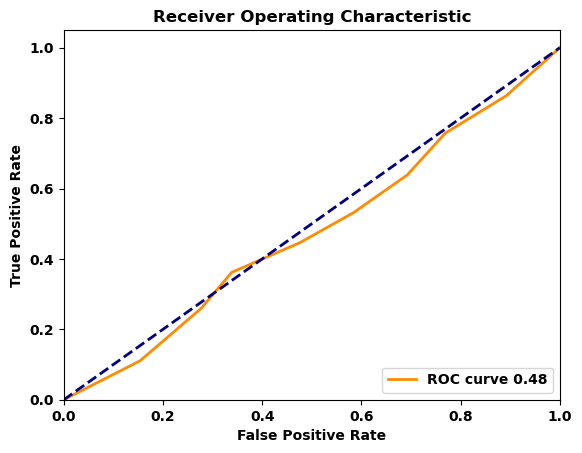

In [274]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [275]:
datos['Time_of_Booking'].unique()

array(['Night', 'Evening', 'Afternoon', 'Morning'], dtype=object)